<a href="https://colab.research.google.com/github/faranak5171/Computer-Vision-Projects/blob/main/basic/Image_Processing_Methods2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

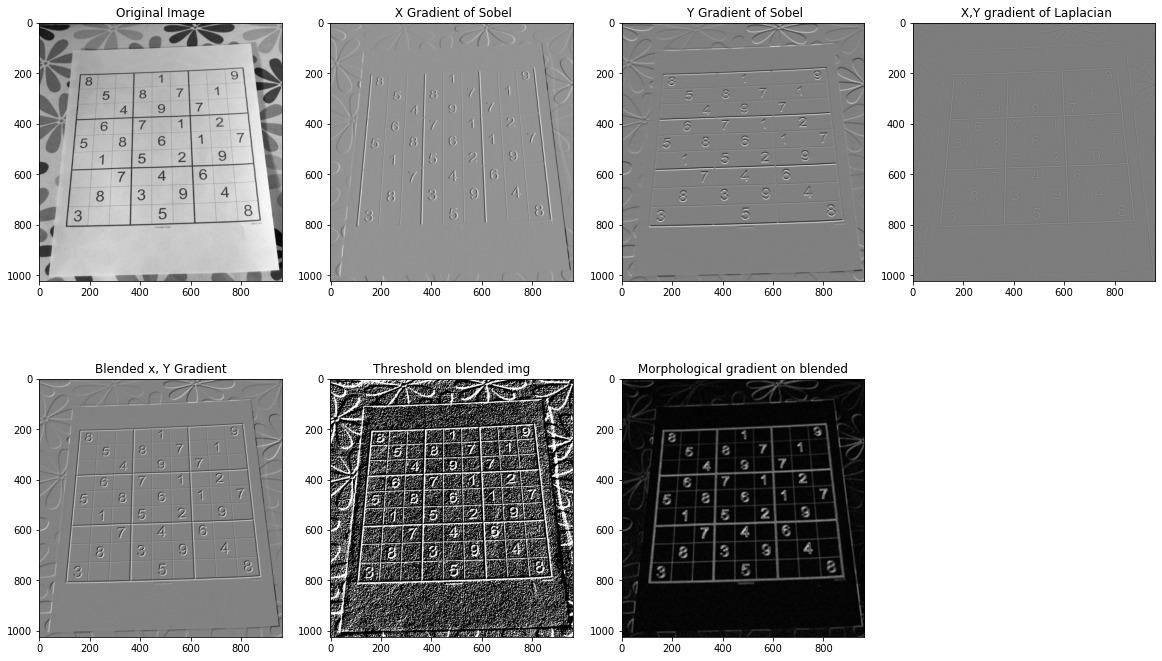

In [26]:
fig = plt.figure(figsize=(20,12))
rows = 2
cols = 4

def display_img(num, img, title):
  ax = fig.add_subplot(rows, cols, num)
  ax.imshow(img, cmap='gray')
  ax.set_title(title)

img = cv2.imread('sudoku.jpg',0)
display_img(1,img, 'Original Image')

# Calculate X gradient sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
display_img(2, sobelx, ' X Gradient of Sobel')

# Calculate Y Gradient Sobel
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
display_img(3, sobely, ' Y Gradient of Sobel')

# Calculate X and Y gradient - Using Laplace and derivatives
laplacian = cv2.Laplacian(img, cv2.CV_64F)
display_img(4, laplacian, ' X,Y gradient of Laplacian')

# Blend X and Y Gradient
blended = cv2.addWeighted(src1=sobelx, alpha= 0.5, src2=sobely, beta=0.5, gamma=0)
display_img(5, blended, 'Blended x, Y Gradient')

# Threshold filter
ret, th1 = cv2.threshold(blended, 50, 255, cv2.THRESH_BINARY)
display_img(6, th1, 'Threshold on blended img')

# Morphological gradient on blended
kernel = np.ones((4,4), dtype=np.uint8)
morph = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
display_img(7, morph, 'Morphological gradient on blended')

<ipython-input-54-43388eaef76b>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(rows, cols, num)
<ipython-input-54-43388eaef76b>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(rows, cols, num)
<ipython-input-54-43388eaef76b>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new ins

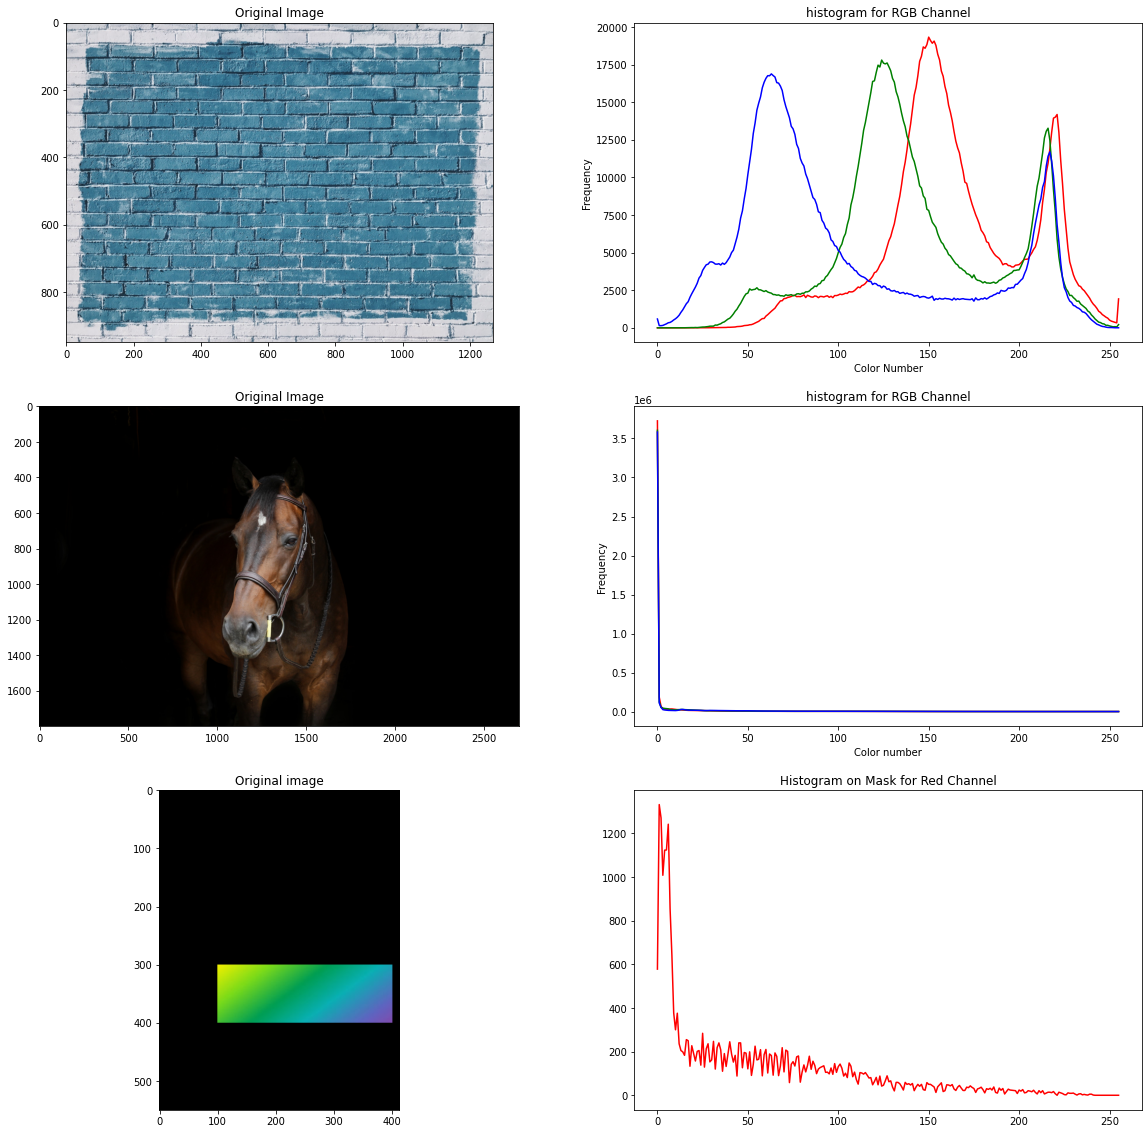

In [54]:
# Create histogram, histogram works on BGR image and matplotlib works on RGB
fig = plt.figure(figsize=(20,20))
rows = 3
cols = 2

def display_hist(num, hist, col, title):
  ax = fig.add_subplot(rows, cols, num)
  ax.plot(hist, color=col)
  ax.set_title(title)

def display_img(num, img, title):
  ax = fig.add_subplot(rows, cols, num)
  ax.imshow(img)
  ax.set_title(title)


horse = cv2.imread('horse.jpg')
show_horse = cv2.cvtColor(horse, cv2.COLOR_BGR2RGB)

bricks = cv2.imread('bricks.jpg')
show_bricks = cv2.cvtColor(bricks, cv2.COLOR_BGR2RGB)

# Calculate histogram for 3 color channels. Order colors in openCV is BGR
display_img(1, show_bricks,'Original Image')

color = ('R','G','B')
for i,col in enumerate(color):
  histr = cv2.calcHist([bricks], channels=[i], mask=None, histSize=[256], ranges=[0,256])
  display_hist(2, histr, col, 'histogram for RGB Channel')
plt.xlabel('Color Number')
plt.ylabel('Frequency')



# Calculate histogram for 3 color channel. Order colors in openCV is BGR
display_img(3, show_horse,'Original Image')

for i,col in enumerate(color):
  histr = cv2.calcHist([horse], channels=[i], mask=None, histSize=[256], ranges=[0,256])
  display_hist(4, histr, col , 'histogram for RGB Channel')
plt.xlabel('Color number')
plt.ylabel('Frequency')

# Calculate histogram on a roi of image
rainbow = cv2.imread('rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

mask = np.zeros(rainbow.shape[0:2], np.uint8)
mask[300:400, 100:400] = 255
rainbow_masked = cv2.bitwise_and(rainbow, rainbow, mask=mask)
show_rainbow_masked = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)
display_img(5, show_rainbow_masked, 'Original image with mask')
hist_rainbow_masked = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256])
display_hist(6,hist_rainbow_masked,'R','Histogram on Mask for Red Channel')